### 数字图像处理第三章

- Write a program for implementing image histogram equalization and matching.
- Write a program for image intensity transformation, requiring the user
can input or choose any transformation functions.
- Write a program for spatial filtering so that it can display different
results based on all kinds of filters when inputting an original image.

#### 直方图均衡化

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

(1024, 2048, 3)


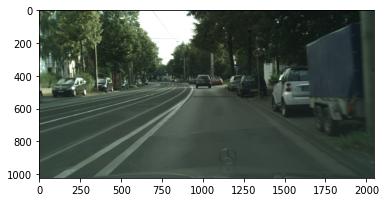

In [ ]:
img_path = os.path.join('drive', 'My Drive', '数字图像处理', 'Image', 'bonn_000000_000019_leftImg8bit.png')
img = cv2.imread(img_path)
img = img[:, :, [2, 1, 0]]
print(img.shape)
plt.imshow(img)

In [ ]:
'''
绘制直方图
'''
def plot_histogram(imgx, name=None):
  h, w, c = imgx.shape
  histogram = np.bincount(imgx[:, :, 0].flatten())
  plt.subplot(1,3,1)
  plt.plot(histogram, 'r')
  if name!=None:
    plt.title(name)

  histogram = np.bincount(imgx[:, :, 1].flatten())
  plt.subplot(1,3,2)
  plt.plot(histogram, 'g')
  if name!=None:
    plt.title(name)

  histogram = np.bincount(imgx[:, :, 2].flatten())
  plt.subplot(1,3,3)
  plt.plot(histogram, 'b')
  if name!=None:
    plt.title(name)

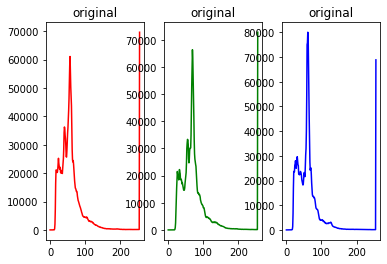

In [ ]:
plot_histogram(img, 'original')

连续直方图均衡化公式：

$T(r) = \int_0^rp(r)d_r$

离散直方图均衡化公式：

$g_{i,j} = floor((L-1)*\sum_{n=0}^{f(i,j)}p_n)$

In [ ]:
def histogramImg(img):
  h, w = img.shape
  histogram = np.bincount(img.flatten(),  minlength=256)
  uniform_hist = (256 - 1) * (np.cumsum(histogram)/(h * w * 1.0))
  uniform_hist = uniform_hist.astype('uint8')

  new_r = np.zeros((h, w), dtype='uint8')
  for i in range(h):
    for j in range(w):
      new_r[i, j] = uniform_hist[img[i, j]]
  return new_r

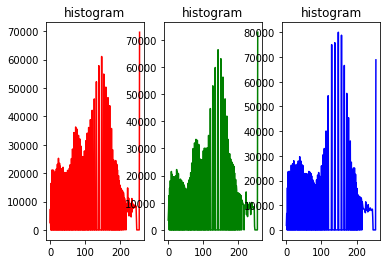

In [ ]:
new_img = np.zeros(img.shape, dtype='uint8')
new_img[:, :, 0] = histogramImg(img[:, : , 0])
new_img[:, :, 1] = histogramImg(img[:, : , 1])
new_img[:, :, 2] = histogramImg(img[:, : , 2])
plot_histogram(new_img, 'histogram')

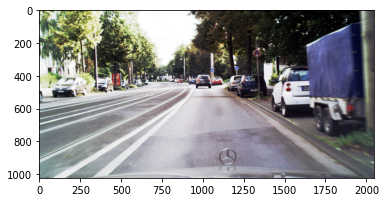

In [ ]:
plt.imshow(new_img)

#### 直方图匹配

输入图像的灰度级r

输出图像的灰度级z

s, v 是中间过渡图像的灰度级

$s = T(r)= (L-1)\int_0^rp_r(w)d_w$

$v = G(z) = (L-1)\int_0^zp_z(t)d_t$

$s = v$

$z = G^{-1}(s)=G^{-1}(T(r))$

In [ ]:
def match_histogramImg(img, target_img):
  h, w = img.shape
  histogram = np.bincount(img.flatten(),  minlength=256)
  uniform_hist = (256-1) * (np.cumsum(histogram) / (h * w * 1.0))
  uniform_hist = uniform_hist.astype('uint8')

  target_histogram = np.bincount(target_img.flatten(), minlength=256)
  target_uniform_hist = (256 -1) * (np.cumsum(target_histogram) / (h * w * 1.0))
  target_uniform_hist = uniform_hist.astype('uint8')

  # 建立映射规则
  maps = {i : 0 for i in range(256)}

  for i in range(256):
    dist = 255
    for j in range(256):
      if abs(uniform_hist[i] - target_uniform_hist[j]) <= dist:
        dist = abs(uniform_hist[i] - target_uniform_hist[j])
        maps[i] = j
  # print(maps)

  new_r = np.zeros((h, w), dtype='uint8')
  for i in range(h):
    for j in range(w):
      new_r[i, j] = maps[img[i, j]]
  return new_r

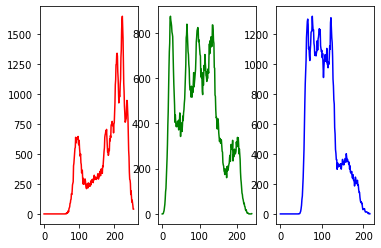

In [ ]:
# 目标直方图
target_img_path = os.path.join('drive', 'My Drive', '数字图像处理', 'Image', 'Lenna.jpg')
target_img = cv2.imread(target_img_path)
target_img = target_img[:, :, [2, 1, 0]]
plot_histogram(target_img)

In [ ]:
new_img_match = np.zeros(img.shape, dtype='uint8')
new_img_match[:, :, 0] = match_histogramImg(img[:, : , 0], target_img[:, :, 0])
new_img_match[:, :, 1] = match_histogramImg(img[:, : , 1], target_img[:, :, 1])
new_img_match[:, :, 2] = match_histogramImg(img[:, : , 2], target_img[:, :, 2])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in ubyte_scalars


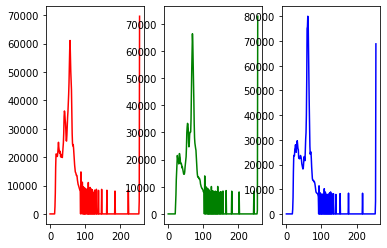

In [ ]:
plot_histogram(new_img_match)

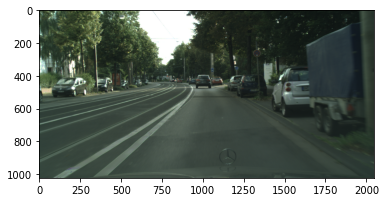

In [ ]:
plt.imshow(new_img_match)

#### 强度变换

(316, 316)


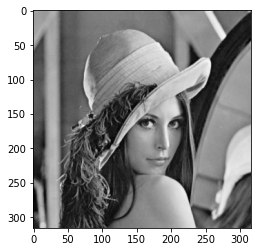

In [ ]:
img = cv2.imread('/content/drive/My Drive/数字图像处理/Image/Lenna.jpg', cv2.IMREAD_GRAYSCALE)
print(img.shape)
plt.imshow(img, cmap='gray')

- 图像反转

$s = (L-1)-r$

In [ ]:
def negatives(img):
  h, w = img.shape
  out = np.zeros(img.shape, dtype='uint8')
  
  for i in range(h):
    for j in range(w):
      out[i, j] = 255 - img[i, j]
  return out

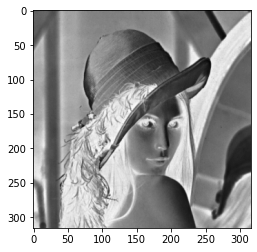

In [ ]:
out = negatives(img)
plt.imshow(out, cmap='gray')

- 对数变换

$s = clog(1+r)$

In [ ]:
def Log(img, c=255 / np.log10(256)):
  h, w = img.shape

  out = np.zeros(img.shape, dtype='uint8')
  for i in range(h):
    for j in range(w):
      out[i, j] = int(c * np.log10(1 + img[i, j]))
  return out

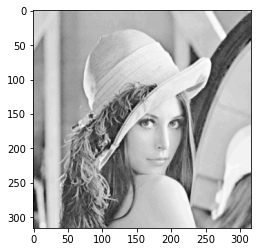

In [ ]:
out = Log(img, 42)
plt.imshow(out, cmap='gray')

- 幂律变换

$s = cr^{\gamma}$

In [ ]:
def gammar(img, g):
  h, w = img.shape
  out = np.zeros(img.shape)
  for i in range(h):
    for j in range(w):
      out[i, j] = int(255**(1-g) * img[i, j]**g)
  return out

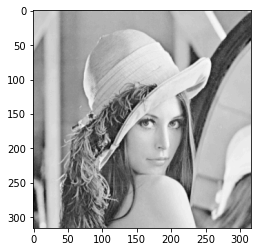

In [ ]:
out = gammar(img, 0.1)
plt.imshow(out, cmap='gray')

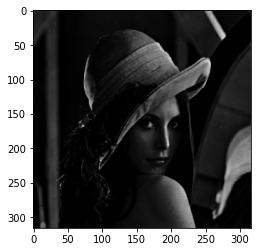

In [ ]:
out = gammar(img, 5)
plt.imshow(out, cmap='gray')

- 模糊集

$v_0 = \frac{\mu_{dark}(z_0)*v_d+\mu_{gray}(z_0)*v_g+\mu_{bright}(z_0)*v_b}{\mu_{dark}(z_0)+\mu_{gray}(z_0)+\mu_{bright}(z_0)}$

In [ ]:
def mu_gray(z):
  if z >= 63 and z < 127:
    return 1 - (127-z) / 64
  elif z >=127 and z <= 191:
    return 1 - (z - 127) / 64
  return 0

def mu_bright(z):
  if z >=127 and z <= 191:
    return 1 - (191 - z) / 64
  elif z > 191:
    return 1
  return 0

def mu_drak(z):
  if z < 63:
    return 1
  elif z >=63 and z <=127:
    return 1 - (z - 63) / 64
  return 0

In [ ]:
def Fuzzy(img):
  h, w = img.shape
  out = np.zeros(shape=img.shape)
  for i in range(h):
    for j in range(w):
      mu_d = mu_drak(img[i, j])
      mu_g = mu_gray(img[i, j])
      mu_b = mu_bright(img[i, j])
      out[i, j] = int((mu_d * 0 + mu_g * 127 + mu_b * 255) / (mu_d + mu_g + mu_b))
  return out

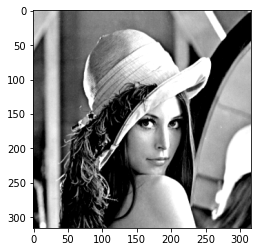

In [ ]:
out = Fuzzy(img)
plt.imshow(out, cmap='gray')

#### 空间滤波

(501, 500, 3)


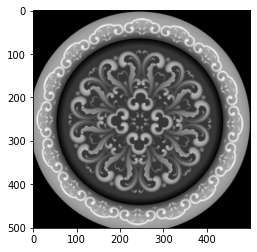

In [ ]:
img_path = "/content/drive/My Drive/数字图像处理/Image/x.jpg"
img = cv2.imread(img_path)
img = img[:, :, [2, 1, 0]]
print(img.shape)
plt.imshow(img)

- Smoothing Spatial Filters(邻域平均)

$g(x, y)= \frac{\sum_{s=-a}^{a}\sum_{t=-b}^bw(s, t)*f(x+s, y+t)}{\sum_{s=-a}^a\sum_{t=-b}^bw(s, t)}$

In [ ]:
def conv2d(img, filters):
  h, w = img.shape
  fh, fw = filters.shape

  # padding
  padding_h = int((fh - 1) / 2)
  padding_w = int((fw - 1) / 2)
  new_img = np.zeros(shape=(h + 2 * padding_h, w + 2 * padding_w))
  new_img[padding_h:h+padding_h, padding_w: w + padding_w] = img

  # conv2d
  out = np.zeros(shape=img.shape)

  for i in range(h):
    for j in range(w):
      out[i, j] = np.sum(new_img[i: i + fh, j : j + fw] * filters)
  
  return out

In [ ]:
def smoothing_filters(img, filters):
  filters = filters / np.sum(filters)
  out = conv2d(img, filters)
  out = np.array(out, dtype='uint8')
  return out

In [ ]:
filters = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
filters

array([[1, 2, 1],
       [2, 4, 2],
       [1, 2, 1]])

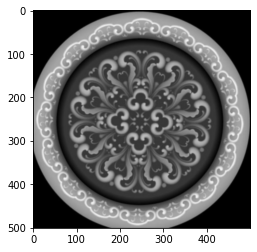

In [ ]:
out = np.zeros(shape=img.shape, dtype='uint8')
out[:, :, 0] = smoothing_filters(img[:, :, 0], filters)
out[:, :, 1] = smoothing_filters(img[:, :, 1], filters)
out[:, :, 2] = smoothing_filters(img[:, :, 2], filters)
plt.imshow(out)

- 𝒎𝒆𝒅𝒊𝒂𝒏  𝒇𝒊𝒍𝒕𝒆𝒓(中值滤波)

In [ ]:
def median_filters(img, filters_shape):
  h, w = img.shape
  fh, fw = filters_shape

  # padding
  padding_h = int((fh - 1) / 2)
  padding_w = int((fw - 1) / 2)
  new_img = np.zeros(shape=(h + 2 * padding_h, w + 2 * padding_w))
  new_img[padding_h:h+padding_h, padding_w: w + padding_w] = img

  # argsort(a), 返回从小到大的(索引)
  out = np.zeros(shape=img.shape, dtype='uint8')

  mid = int((fh * fw) / 2)
  for i in range(h):
    for j in range(w):
      mid_img = new_img[i: i + fh, j : j + fw].reshape(1, -1)[0]
      out[i, j] = mid_img[np.argsort(mid_img)[mid]]
      
  return out

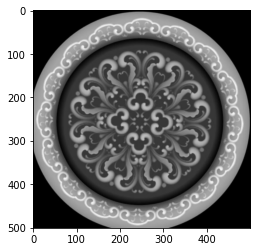

In [ ]:
out = np.zeros(shape=img.shape, dtype='uint8')
out[:, :, 0] = median_filters(img[:, :, 0], (3, 3))
out[:, :, 1] = median_filters(img[:, :, 1], (3, 3))
out[:, :, 2] = median_filters(img[:, :, 2], (3, 3))
plt.imshow(out)

- Laplacian(拉普拉斯锐化)

$g(x, y)=f(x, y)+c[f''(x,y)]$

In [ ]:
def laplacian_filter(img, filters=np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])):
  out = conv2d(img, filters)
  out = np.array(out, dtype='uint8')
  return out

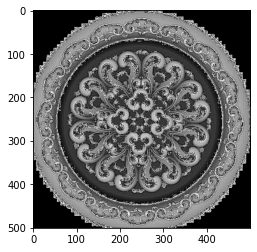

In [ ]:
out = np.zeros(shape=img.shape, dtype='uint8')
out[:, :, 0] = laplacian_filter(img[:, :, 0])
out[:, :, 1] = laplacian_filter(img[:, :, 1])
out[:, :, 2] = laplacian_filter(img[:, :, 2])
plt.imshow(out)

- First-Order Derivatives(一阶微分锐化)

In [ ]:
def first_order_filter(img, filters=np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])):
  out = conv2d(img, filters)
  out = np.array(out, dtype='uint8')
  return out

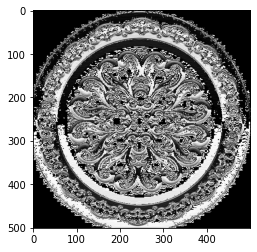

In [ ]:
out = np.zeros(shape=img.shape, dtype='uint8')
out[:, :, 0] = first_order_filter(img[:, :, 0])
out[:, :, 1] = first_order_filter(img[:, :, 1])
out[:, :, 2] = first_order_filter(img[:, :, 2])
plt.imshow(out)